## Exploring the Emotion Detection Dataset

---
### **Loading the dataset**
We loaded the dataset by reading legend.csv to obtain the mapping between each image and its corresponding emotion label. Using this mapping, we iterated through the directory, opened each image, converted it to grayscale, resized it to 48×48 pixels, and stored the resulting arrays in X with their associated integer labels in Y.

In [1]:
# necessary imports
import os
import  numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from collections import Counter

# confirm labels
legend = pd.read_csv("facial_expressions/data/legend.csv")
legend["emotion"] = legend["emotion"].str.lower().str.strip()
print(legend.head())

# confirm classes
classes = sorted(legend["emotion"].unique())
class_idx = {c:i for i,c in enumerate(classes)}
print("Emotion classes:", classes)                              # prints all possible labels

# build X and Y
image_dir = "facial_expressions/images"
X = []
Y = []

for i, row in legend.iterrows():
    image = row["image"]
    emotion = row["emotion"]

    img_path = os.path.join(image_dir, image)

    img = Image.open(img_path).convert("L").resize((48, 48))    # load image, grayscale, resize to 48x48 pixels
    X.append(np.array(img))                           
    Y.append(class_idx[emotion])

X = np.array(X)
Y = np.array(Y)

  user.id                            image   emotion
0     628  facial-expressions_2868588k.jpg     anger
1     628  facial-expressions_2868585k.jpg  surprise
2     628  facial-expressions_2868584k.jpg   disgust
3     628  facial-expressions_2868582k.jpg      fear
4   dwdii           Aaron_Eckhart_0001.jpg   neutral
Emotion classes: ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']


---
### **Basic Summary**
We began by summarizing the characteristics of the facial expressions dataset. We measured the number of images per class, the image dimensions, and the channel structure. This allowed us to identify class imbalance and determine appropriate preprocessing choices.

* **Shape of total images:** (13690, 48, 48)

* **Shape of classes (emotions):** (13690,)

* **Number of features:** 2304

* **Class distribution:** 

* **Pixel intensity:** 

Shape of feature vectors:  (13690, 48, 48)
Shape of labels:  (13690,)
Number of features:  2304
Number of examples:  13690
Class distribution:  Counter({np.int64(5): 6868, np.int64(4): 5696, np.int64(7): 368, np.int64(6): 268, np.int64(0): 252, np.int64(2): 208, np.int64(3): 21, np.int64(1): 9})


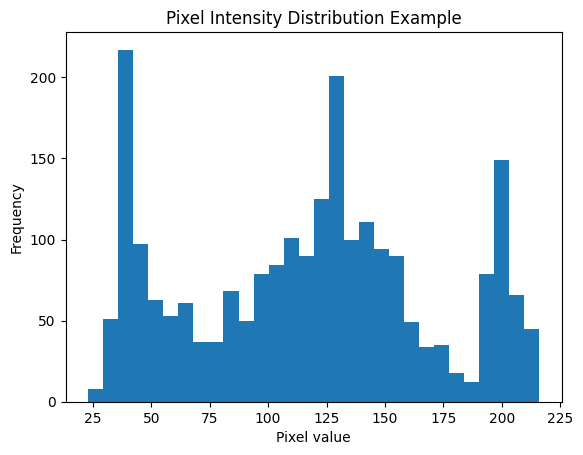

In [2]:
# shape
print("Shape of feature vectors: ", X.shape)
print("Shape of labels: ", Y.shape)

print("Number of features: ", X.shape[1] * X.shape[2])
print("Number of examples: ", X.shape[0])

# class imbalance
print("Class distribution: ", Counter(Y))

# pixel distrribution
plt.hist(X[0].flatten(), bins=30)
plt.title("Pixel Intensity Distribution Example")
plt.xlabel("Pixel value")
plt.ylabel("Frequency")
plt.show()

### **Distributions of Key Features**
Visualizing 10 representative features and computing statistics on the data to understand its distribution and presence of outliers using histograms

* **Meaningful features:** Mix of low variance, high variance features, skewed, not skewed
* **Looking out for:** Heavy tails, outliers, skewness, very flat/low variance features, bimodal distributions

### **Correlations / Feature Relationships**
Examining correlations to identify redundant or highly related features. Regularization or dimensionality reduction could improve performance if there are strong correlations.

* **Strong correlations (|r| > 0.8):** Suggests redundancy
* **Almost no correlation (|r| < 0.8):** Not informative alone, might matter comined

### ***Model Training & Evaluation**
We trained multiple classifiers to predict emotions and compared their performance.

Data shapes: (13690, 2304) (13690,)

Baseline Model:
Most common emotion: 5
Baseline accuracy: 0.5018261504747992

Training Logistic Regression...


/Users/ethan/InsideOut/venv/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression accuracy: 0.7030679327976626

Running PCA dimensionality reduction...

Training Linear SVM on PCA data...
Linear SVM (with PCA) accuracy: 0.7669831994156319

Training Decision Tree...
Decision Tree accuracy: 0.5898466033601169

=== Accuracy Comparison ===
Baseline:            0.5018261504747992
Logistic Regression: 0.7030679327976626
Linear SVM:          0.7669831994156319
Decision Tree:       0.5898466033601169

Best model: svm


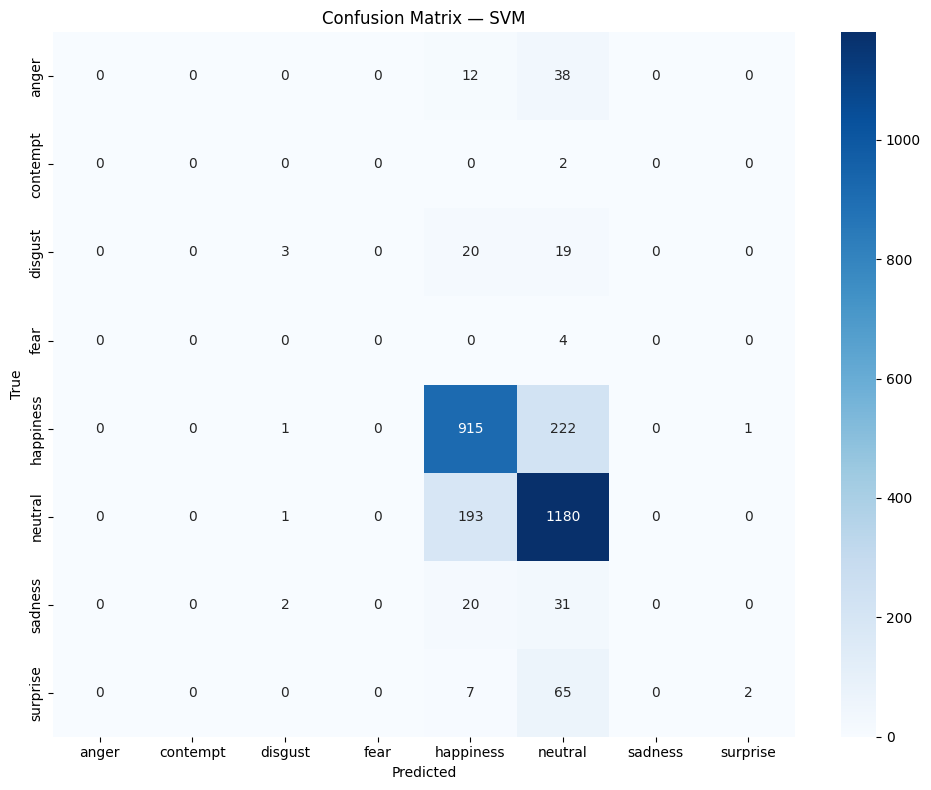

In [3]:
from model import run_models

classes = ['anger', 'contempt', 'disgust', 'fear', 'happiness', 'neutral', 'sadness', 'surprise']

accuracies = run_models(X, Y, class_names=classes)